<IPython.core.display.Javascript object>


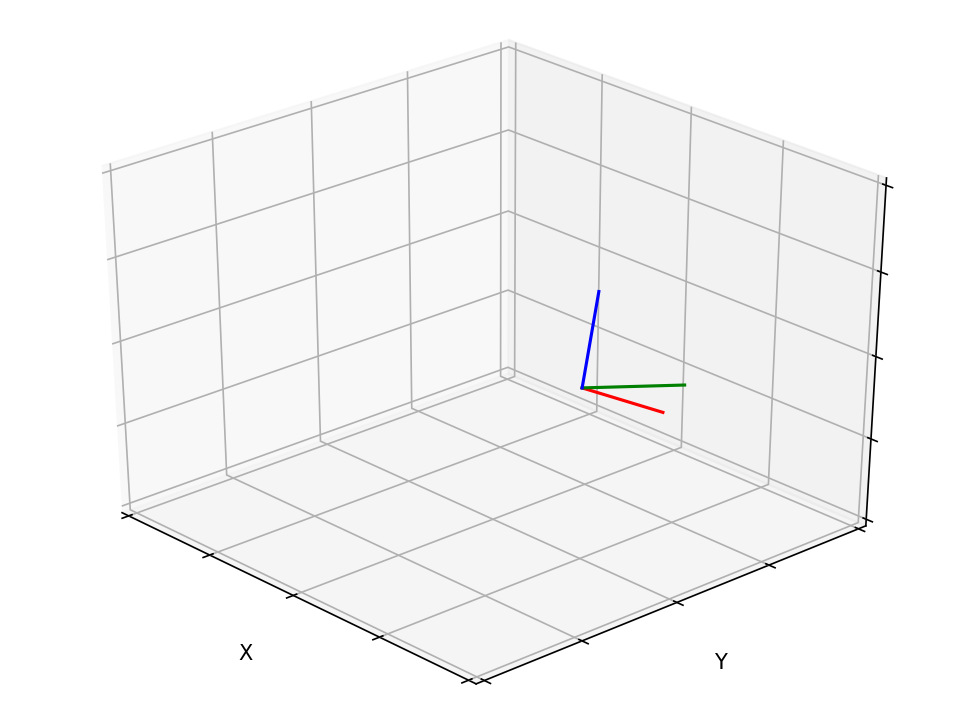

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d, Axes3D
from pytransform3d.rotations import *
from pytransform3d.transformations import *
from itertools import product, combinations

%matplotlib notebook
l_l = -2
h_l = 2

fig = plt.figure()
ax = Axes3D(fig)
ax.set_aspect("auto")
ax.set_autoscale_on(True)
plt.setp(
    ax, 
    xlim=(l_l, h_l), 
    ylim=(l_l, h_l), 
    zlim=(l_l, h_l),
    xlabel="X", 
    ylabel="Y", 
    zlabel="Z"
)
plt.tick_params(axis='both', labelsize=10, )
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::2])
ax.set_zticks(ax.get_zticks()[::2])

basis = np.eye(3)

theta = np.deg2rad(30)
cos, sin = np.cos(theta), np.sin(theta)
Rz = np.array([[cos, -sin, 0], [sin, cos, 0], [0, 0, 1]])
Rx = np.array([[1, 0, 0], [0, cos, -sin], [0, sin, cos]])
Ry = np.array([[cos, 0, sin], [0, 1, 0], [-sin, 0, cos]])

unitx = np.array([1.0, 0.0, 0.0])
unity = np.array([0.0, 1.0, 0.0])
unitz = np.array([0.0, 0.0, 1.0])

#for d, c in enumerate(["r", "g", "b"]):
#     print([0.0, basis[0, d]]) 
#     print(f'___{d}')
#     print([0.0, basis[1, d]]) 
#     print(f'___{d}')
#     print([0.0, basis[2, d]])  
#     print(f'___{d}')
#     ax.plot([0.0, basis[0, d]],
#             [0.0, basis[1, d]],
#             [0.0, basis[2, d]], color=c, lw=2)
#ax.plot3D(xs,ys,zs, color='b')
#ax.plot([0.0, 0.0], [1.0, 0.0], [0.0, 0.0], color='g')
#ax.plot([0.0, 0.0], [0.0, 0.0], [1.0, 0.0], color='b')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.show()


angle = np.deg2rad(90)
c = np.cos(angle)
s = np.cos(angle)
n = norm_angle(angle)
x = matrix_from_angle(0, n)
y = matrix_from_angle(1, n)
R1 = np.dot(x.T, y.T)
R2 = np.dot(y.T, x.T)

R3 = matrix_from_euler_xyz([0.5, 0.2, 0.1])
euler_a = euler_xyz_from_matrix(R3)
# plot_basis(R=R3)
# apply round on matrix preview due to numpy high machine precision on calculations epsilon values 
# print(R1.round(2))
# print('__change in multiplication order___')
# print(R2.round(2))
# print(euler_a)
rpy2r = matrix_from_euler_zyx([0.1, 0.2, 0.3])
move = np.array([1, 0, 0])
transform = transform_from(rpy2r, move)
plot_transform(ax=ax, A2B=transform)

In [5]:
def matrix_from_angle(basis, angle):
    theta = np.deg2rad(angle)
    c = np.cos(theta)
    s = np.sin(theta)

    if basis == 'x':
        R = np.array([[1.0, 0.0, 0.0],
                      [0.0, c, s],
                      [0.0, -s, c]])
    elif basis == 'y':
        R = np.array([[c, 0.0, -s],
                      [0.0, 1.0, 0.0],
                      [s, 0.0, c]])
    elif basis == 'z':
        R = np.array([[c, s, 0.0],
                      [-s, c, 0.0],
                      [0.0, 0.0, 1.0]])
    else:
        raise ValueError("Basis must be defined")

    return R


In [2]:
def plot_basis(ax=None, R=None, p=np.zeros(3), s=1.0, ax_s=1, **kwargs):
    """Plot basis of a rotation matrix.
    Parameters
    ----------
    ax : Matplotlib 3d axis, optional (default: None)
        If the axis is None, a new 3d axis will be created
    R : array-like, shape (3, 3), optional (default: I)
        Rotation matrix, each column contains a basis vector
    p : array-like, shape (3,), optional (default: [0, 0, 0])
        Offset from the origin
    s : float, optional (default: 1)
        Scaling of the frame that will be drawn
    ax_s : float, optional (default: 1)
        Scaling of the new matplotlib 3d axis
    kwargs : dict, optional (default: {})
        Additional arguments for the plotting functions, e.g. alpha
    Returns
    -------
    ax : Matplotlib 3d axis
        New or old axis
    """
    if ax is None:
        ax = make_3d_axis(ax_s)

    if R is None:
        R = np.eye(3)
    

    A2B = np.eye(4)
    A2B[:3, :3] = R
    A2B[:3, 3] = p

    frame = Frame(A2B, s=s, **kwargs)
    frame.add_frame(ax)

    return ax

In [7]:
d = [-1, 1]

theta = np.radians(30)

a = np.array(list(product(d,d,d)))

b = combinations(a,2)
#print(sum(1 for _ in b))
    # for s,e in b:
#     print(s,e )
for s, e in combinations(np.array(list(product(d,d,d))), 2):
    if np.sum(np.abs(s-e)) == d[1]-d[0]:
        ax.plot(*zip(s,e), color="c")
        
for s, e in combinations(np.array(list(product(d,d,d))), 2):
    if np.sum(np.abs(s-e)) == d[1]-d[0]:
        s_rotated = [s[0] * np.cos(theta) - s[1] * np.sin(theta), 
                     s[0] * np.sin(theta) + s[1] * np.cos(theta),
                     s[2]]
        e_rotated = [e[0] * np.cos(theta) - e[1] * np.sin(theta), 
                     e[0] * np.sin(theta) + e[1] * np.cos(theta),
                     e[2]]      
        ax.plot3D(*zip(s_rotated,e_rotated), color="g")
        

array([[ 0.9363,  0.2896, -0.1987],
       [-0.2751,  0.9564,  0.0978],
       [ 0.2184, -0.037 ,  0.9752]])

In [8]:
a = np.arange(9) - 4

In [9]:
a.reshape(3,3)

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [10]:
v = a.copy()
b = v.ravel()


In [11]:
a

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [208]:
D = np.linalg.det(rot_x.T)
I = np.linalg.inv(rot_x.T)
I

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17,  1.000000e+00],
       [-0.000000e+00, -1.000000e+00,  6.123234e-17]])